# GDP growth Prediction of Pakistan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The "Predicting GDP Growth of Pakistan: A Linear Regression Approach" project aims to develop a predictive model to forecast the Gross Domestic Product (GDP) growth  of Pakistan. GDP is a vital economic indicator that measures the overall economic performance of a country, and accurate predictions can provide valuable insights for policymakers, businesses, and investors.

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("gdp_growth_pakistan.csv")

#year = df['Year']
#g_growth = df['GDP']
gdp_growth = (df['GDP'] - df['GDP'].min()) / (df['GDP'].max() - df['GDP'].min())

# Normalize years to [0, 1]
year= (df['Year'] - df['Year'].min()) / (df['Year'].max() - df['Year'].min())

# Printing to verify the data
print("Year:", year)
print("Gdp growth:", gdp_growth)


Year: 0     0.000000
1     0.027778
2     0.055556
3     0.083333
4     0.111111
5     0.138889
6     0.166667
7     0.194444
8     0.222222
9     0.250000
10    0.277778
11    0.305556
12    0.333333
13    0.361111
14    0.388889
15    0.416667
16    0.444444
17    0.472222
18    0.500000
19    0.527778
20    0.555556
21    0.583333
22    0.611111
23    0.638889
24    0.666667
25    0.694444
26    0.722222
27    0.750000
28    0.777778
29    0.805556
30    0.833333
31    0.861111
32    0.888889
33    0.916667
34    0.944444
35    0.972222
36    1.000000
Name: Year, dtype: float64
Gdp growth: 0     0.000000
1     0.006429
2     0.028869
3     0.036148
4     0.036784
5     0.061075
6     0.075237
7     0.087912
8     0.089762
9     0.128791
10    0.140617
11    0.136796
12    0.135523
13    0.120815
14    0.130155
15    0.123241
16    0.124939
17    0.164877
18    0.218674
19    0.261099
20    0.326783
21    0.378396
22    0.438804
23    0.431132
24    0.462973
25    0.587245
26    0.62

In [3]:
print ('The shape of year is:', year.shape)
print ('The shape of gdp growth is: ', gdp_growth.shape)
print ('Number of training examples (m):', len(year))

The shape of year is: (37,)
The shape of gdp growth is:  (37,)
Number of training examples (m): 37


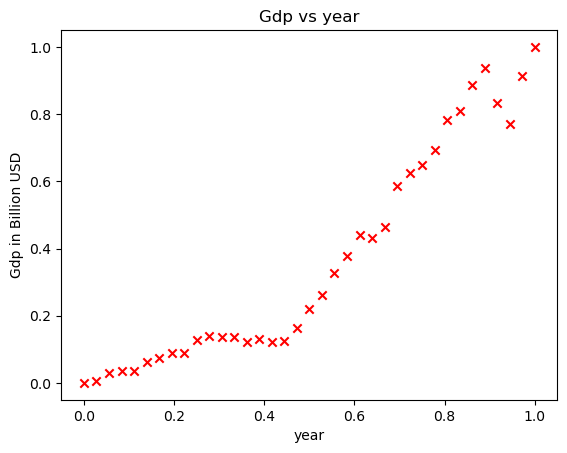

In [4]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters

plt.scatter(year, gdp_growth, marker='x', c='r') 

# Set the title
plt.title("Gdp vs year")
# Set the y-axis label
plt.ylabel('Gdp in Billion USD')
# Set the x-axis label
plt.xlabel('year')
plt.show()

# Applying Linear Regression to make predictions

Cost Function

In [5]:
def cost_func(x,y,w,b):
    m=len(year)
    total_cost=0
    cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost+=(f_wb-y[i])**2
    total_cost=cost/2*m
    return total_cost

Gradient Descent

In [6]:
def compute_gradient(x,y,w,b):
    m=len(year)
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw+=(f_wb-y[i])*x[i]
        dj_db+=f_wb-y[i]
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_dw,dj_db

In [7]:
def gradient_descent(x,y,w_in,b_in,cost_func,gradient_fun,alpha,num_iter):
    m=len(year)
    wpara=w_in
    bpara=b_in
    for i in range(num_iter):
        dj_dw,dj_db=gradient_fun(x,y,wpara,bpara)
        
        wpara=wpara-alpha*dj_dw
        bpara=bpara-alpha*dj_db
    
    return wpara,bpara

In [8]:
initial_w=0
initial_b=0
alpha=0.01
iterations=2000
w,b=gradient_descent(year,gdp_growth,initial_w,initial_b,cost_func,compute_gradient,alpha,iterations)
print("w= ",w)
print("b= ",b)

w=  0.815513995841569
b=  -0.03140049862051004


In [9]:
m = year.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * year[i] + b

Text(0.5, 0, 'year')

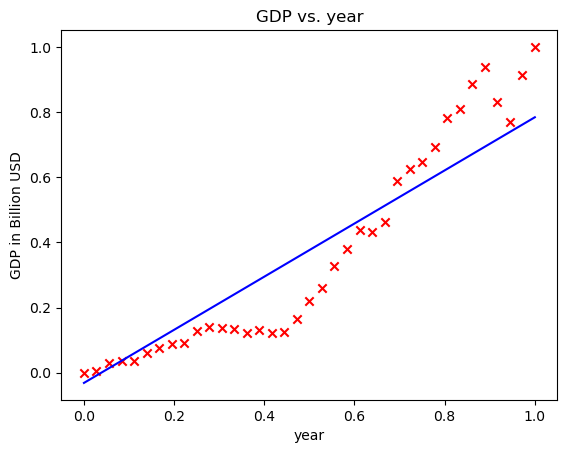

In [10]:
# Plot the linear fit
plt.plot(year, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(year, gdp_growth, marker='x', c='r') 

# Set the title
plt.title("GDP vs. year")
# Set the y-axis label
plt.ylabel('GDP in Billion USD')
# Set the x-axis label
plt.xlabel('year')

Model Trained :) Now use it for making predictions

In [11]:
# Scale the input year to the range [0, 1]
y=2023
scaled_year = (y - df['Year'].min()) / (df['Year'].max() - df['Year'].min())

predicted_gdp_growth_scaled = w * scaled_year + b

# Rescale the predicted GDP growth back to the original range (Billion USD)
predicted_gdp_growth = predicted_gdp_growth_scaled * (df['GDP'].max() - df['GDP'].min()) + df['GDP'].min()

print(f"GDP = {predicted_gdp_growth} in Billion USD")

GDP = 312.7693750455251 in Billion USD
